# 1. Import libraries
import all the modules, functions and objects

In [1]:
# libraries
import pandas
import pylab
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from yellowbrick.model_selection import LearningCurve

In [2]:
dataset = pandas.read_csv('diabetes.csv')
diabetes_data_copy = dataset.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)



In [3]:
sc_X = StandardScaler()
X =  pandas.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = diabetes_data_copy.Outcome
X

/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-3.351824e-02,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-5.298590e-01,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-6.953060e-01,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-5.298590e-01,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669e+00,0.670643,0.316566,1.549303,5.484909,-0.020496
5,0.342981,-0.186965,1.319287e-01,-0.012301,-0.181541,-0.997745,-0.818079,-0.275760
6,-0.250952,-1.436303,-1.853434e+00,0.329171,-0.610145,-0.211799,-0.676133,-0.616111
7,1.827813,-0.219843,1.175571e-15,-0.012301,-0.181541,0.414047,-1.020427,-0.360847
8,-0.547919,2.476096,-1.989652e-01,1.808882,4.660524,-0.284572,-0.947944,1.681259
9,1.233880,0.108930,1.951845e+00,-0.012301,-0.181541,-0.022590,-0.724455,1.766346


# 5. Evaluate some algorithms
 it is time to create some models 

## 5.1 Create a Validation Dataset
split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [4]:
# Split-out validation dataset

#X = array[:,0:4]
Y = diabetes_data_copy.Outcome
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [5]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [6]:
parameters =[{'kernel': ['rbf', 'linear'], 'C': [.01, .1, 1, 10, 100, 1000]}]
svm_model=GridSearchCV(estimator=svm.SVC(),param_grid=parameters,cv=5,n_jobs=-1,scoring='precision')
svm_model.fit(X_train,Y_train)
print(svm_model.best_params_)

prediction=svm_model.predict(X_validation)
print('Accuracy for SVM is', sklearn.metrics.accuracy_score(prediction,Y_validation))
    

{'C': 0.1, 'kernel': 'rbf'}
Accuracy for SVM is 0.7727272727272727


/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [7]:
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
prediction=lr_model.predict(X_validation)
print('The accuracy of the Logistic Regression is',sklearn.metrics.accuracy_score(prediction,Y_validation))

The accuracy of the Logistic Regression is 0.7727272727272727


/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', svm.SVC(kernel='linear', C=10)))
models.append(('SVM2', svm.SVC(kernel='rbf', C=0.1)))
models.append(('Logistic Regression', LogisticRegression()))
              
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

KNN: 0.745849 (0.052877)
CART: 0.674167 (0.029299)
SVM: 0.765415 (0.051428)
SVM2: 0.740984 (0.060405)
Logistic Regression: 0.768720 (0.056545)


/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sunshuhan/anaconda3/lib/python3.7/si

## learn curve and validate curve

In [9]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return plt

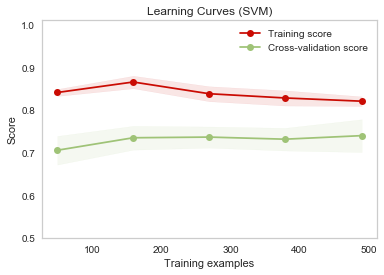

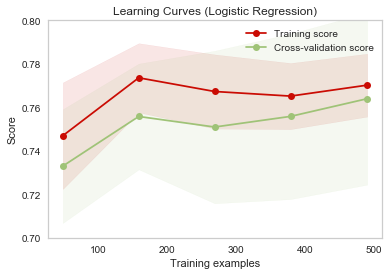

<module 'matplotlib.pyplot' from '/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [10]:
plot_learning_curve(svm.SVC(), "Learning Curves (SVM)", X_train,Y_train, ylim=(0.5, 1.01), cv=5, n_jobs=4)
plot_learning_curve(LogisticRegression(), "Learning Curves (Logistic Regression)", X_train,Y_train, ylim=(0.7, 0.8), cv=5, n_jobs=4)

# viz = LearningCurve(svm.SVC(), train_sizes=sizes, scoring='r2')
# viz.fit(X, y)
# viz.poof()




In [11]:

def plot_validation_curve(estimator, param_name, param_range, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring="accuracy", n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with SVM")
    plt.xlabel(r"$\gamma$")
    plt.ylabel("Score")
    plt.ylim(ylim)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

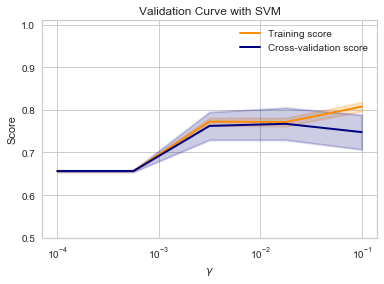

In [12]:
param_range = np.logspace(-4, -1, 5)
param_name="gamma"
plot_validation_curve(svm.SVC(), param_name, param_range, "validation_curve (SVM)", X_train,Y_train, ylim=(0.5, 1.01), cv=5, n_jobs=1)
#plot_validation_curve(LogisticRegression(), "Learning Curves (Logistic Regression)", X_train,Y_train, ylim=(0.7, 0.8), cv=5, n_jobs=4)


## Ensembling

In [13]:

linear_svc=svm.SVC(kernel='linear',C=10,gamma=10,probability=True)
radial_svm=svm.SVC(kernel='rbf',C=0.1,gamma=10,probability=True)
lr=LogisticRegression(C=0.1)

ensemble_rad_lr_lin=VotingClassifier(estimators=[('Radial_svm', radial_svm), ('Logistic Regression', lr),('Linear_svm',linear_svc)], 
                       voting='soft', weights=[2,1,3]).fit(X_train,Y_train)
print('The ensembled model with all the 3 classifiers is:',ensemble_rad_lr_lin.score(X_validation,Y_validation))

The ensembled model with all the 3 classifiers is: 0.7857142857142857


/Users/sunshuhan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
